### AI1 Project

### Team:
 - Yashraj Wani
 - Kush Vashishth
 - Gunakar Goswami
 - Ramneet Singh

### Presentation Video Link 
https://youtu.be/_BAE4QOimEM
#### Slides Link
https://docs.google.com/presentation/d/1Dn54ITBFWThLSpat5FPGjGGL-5uNmVfwNixXSXPPUtM/edit?usp=sharing

In [1]:
#Libraries
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.neighbors import KNeighborsClassifier
#from prettytable import PrettyTable
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
#plots
fifa_20 = pd.read_csv("fifadataset/players_20.csv")

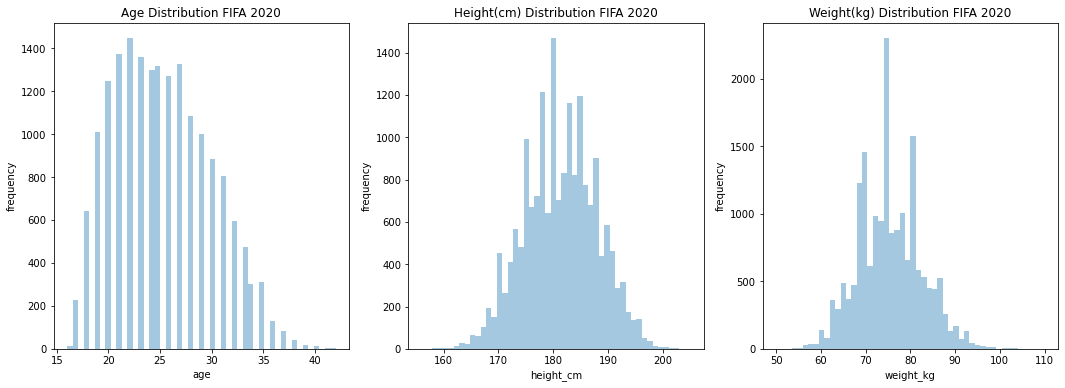

In [3]:
fig, ax = plt.subplots(1,3,figsize=(18,6))

sns.distplot(ax=ax[0], a=fifa_20.age, kde=False)
sns.distplot(ax=ax[1], a=fifa_20.height_cm, kde=False)
sns.distplot(ax=ax[2], a=fifa_20.weight_kg, kde=False)

ax[0].set_title("Age Distribution FIFA 2020")
ax[1].set_title("Height(cm) Distribution FIFA 2020")
ax[2].set_title("Weight(kg) Distribution FIFA 2020")

for i in range(3):
    ax[i].set_ylabel("frequency")

Text(0.5, 1.0, 'Value and Wage Comparison for various players')

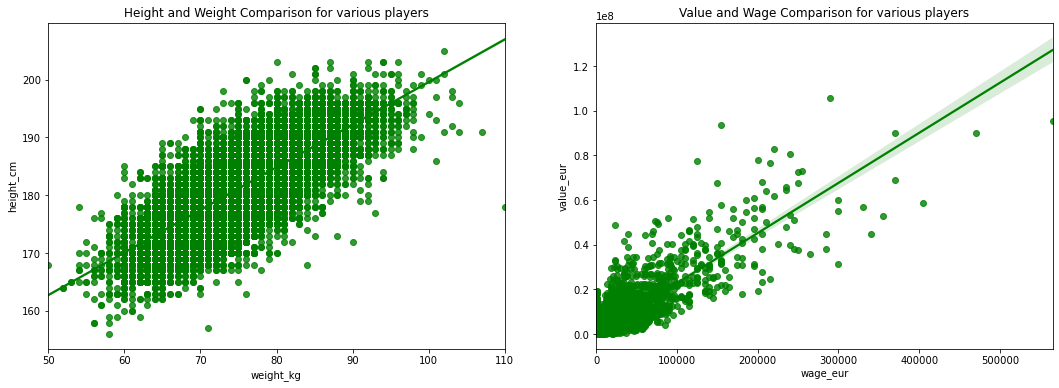

In [4]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.regplot(y="height_cm", x="weight_kg", data=fifa_20,ax=ax[0], color="g")
sns.regplot(y='value_eur', x='wage_eur', data=fifa_20,ax=ax[1], color="g")

ax[0].set_title("Height and Weight Comparison for various players")
ax[1].set_title("Value and Wage Comparison for various players")

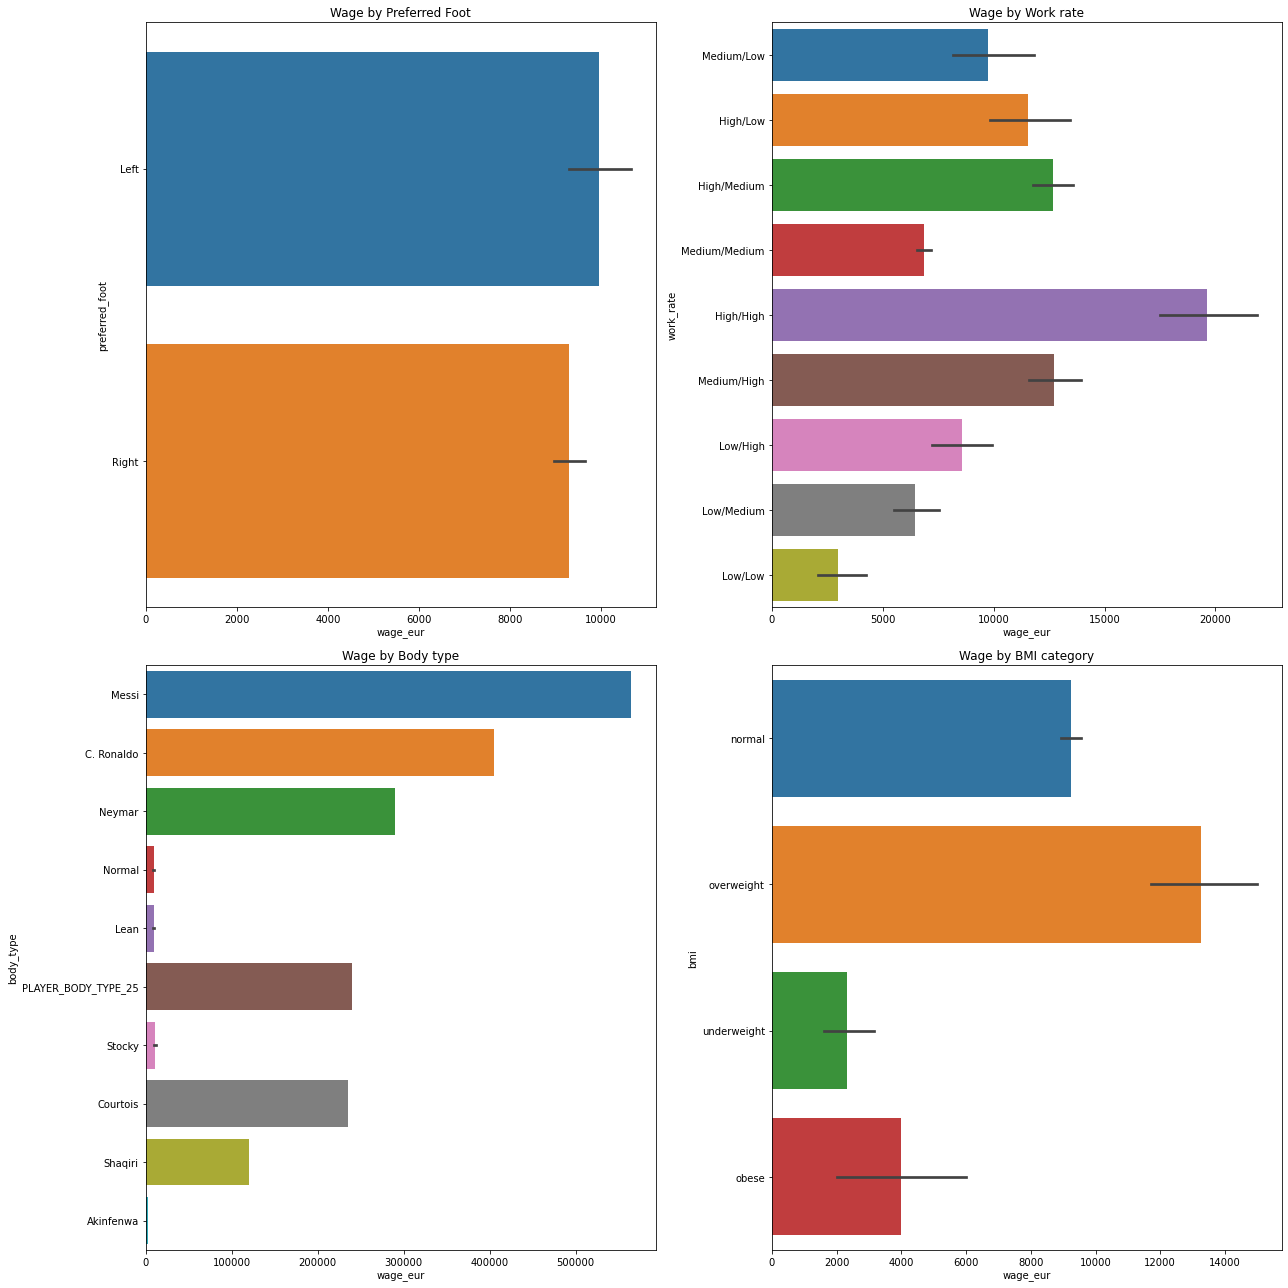

In [5]:
fifa_20["bmi"] = fifa_20.weight_kg/(fifa_20.height_cm/100)**2
rule = (fifa_20["bmi"]<18.5, (18.5<=fifa_20["bmi"])& (fifa_20["bmi"]<25), (25<=fifa_20["bmi"]) & (fifa_20["bmi"]<30), 30<=fifa_20["bmi"])
fifa_20.bmi[rule[0]] = "underweight"
fifa_20.bmi[rule[1]] = "normal"
fifa_20.bmi[rule[2]] = "overweight"
fifa_20.bmi[rule[3]] = "obese"

fig, ax = plt.subplots(2,2,figsize=(18,18))
ax = ax.ravel()

sns.barplot(data=fifa_20, y="preferred_foot", x="wage_eur", ax=ax[0])
sns.barplot(data=fifa_20, y="work_rate", x="wage_eur", ax=ax[1])
sns.barplot(data=fifa_20, y="body_type", x="wage_eur", ax=ax[2])
sns.barplot(data=fifa_20, y='bmi', x="wage_eur", ax=ax[3])

ax[0].set_title("Wage by Preferred Foot")
ax[1].set_title("Wage by Work rate")
ax[2].set_title("Wage by Body type")
ax[3].set_title("Wage by BMI category")

fig.tight_layout()

Text(0.5, 0.98, 'Relation with Overall')

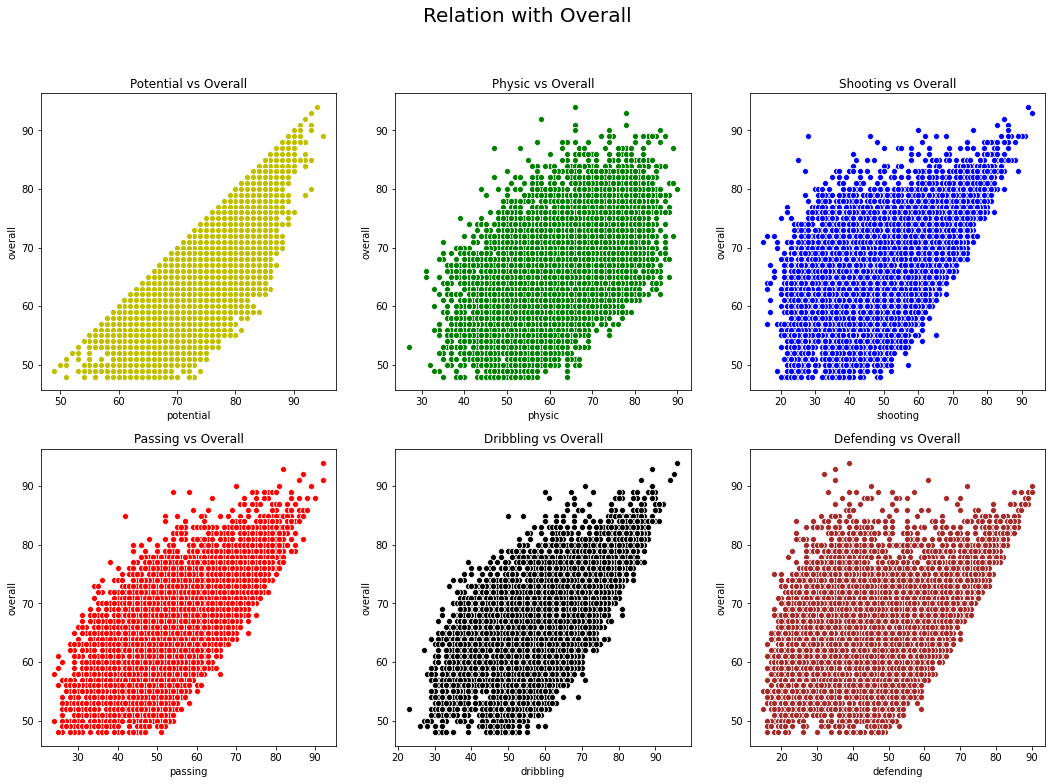

In [6]:
fig, ax = plt.subplots(2,3,figsize=(18,12))
ax = ax.ravel()

sns.scatterplot(y="overall", x="potential", data=fifa_20, color="y", ax=ax[0])
sns.scatterplot(y='overall', x='physic', data=fifa_20, color="g", ax=ax[1])
sns.scatterplot(y="overall", x="shooting", data=fifa_20, color="b", ax=ax[2])
sns.scatterplot(y='overall', x='passing', data=fifa_20, color="r", ax=ax[3])
sns.scatterplot(y="overall", x="dribbling", data=fifa_20, color="black", ax=ax[4])
sns.scatterplot(y='overall', x='defending', data=fifa_20, color="brown", ax=ax[5])


ax[0].set_title("Potential vs Overall")
ax[1].set_title("Physic vs Overall")
ax[2].set_title("Shooting vs Overall")
ax[3].set_title("Passing vs Overall")
ax[4].set_title("Dribbling vs Overall")
ax[5].set_title("Defending vs Overall")

fig.suptitle("Relation with Overall", size=20)

Text(0, 0.5, 'frequency')

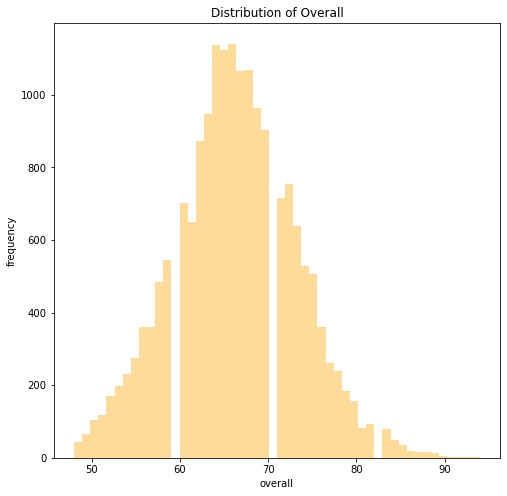

In [7]:
plt.figure(figsize=(8,8))
sns.distplot( a=fifa_20.overall, kde=False, color="orange")
plt.title("Distribution of Overall")
plt.ylabel("frequency")

<div style="color:black;background-color:#F6E6E2"-">
    
# **Part A - Rank the Players**

Who is the best player in the world according to your analysis?

Use data from FIFA 19. Predict the Overall (OVR ) skill Statistic for players in the FIFA 20 Edition. Train on all players from FIFA 19

Graphically represent the Overall data for the players in test set (see below)



**Instructions :**

Sofifa Id, URL, Name, Potential, Real face, URL variables cannot be used during the prediction or learning. 

In case of a change in playing position, alter FIFA 20 position to match FIFA 19 Position 

The final score will be assigned using MSE. 

Test Set: Players from the following Clubs 
<ul>
    
  - FC Barcelona
    
  - FC Bayern München

  - Real Madrid 

  - Paris Saint-Germain

  - Juventus

  - Manchester City

  - Liverpool FC 
</ul>

In [8]:
#Loading data/content/sample_data/mnist_test.csv
fifa_19 = pd.read_csv("fifadataset/players_19.csv")
fifa_20 = pd.read_csv("fifadataset/players_20.csv")

X_train_full = fifa_19.drop('overall', axis=1)
X_test_full = fifa_20.drop('overall', axis=1)
y_train = fifa_19.overall
y_test = fifa_20.overall

X_train_full.set_index("sofifa_id", inplace=True)
X_test_full.set_index("sofifa_id", inplace=True)
y_train.index = X_train_full.index
y_test.index = X_test_full.index

In [9]:
def try_eval(x):
    """Converts to float64 else returns as it is"""
    try:
        return eval(x)
    except:
        return x

def print_full(x):
    """Used to print complete Series"""
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
def preprocess(x_train, x_test):
    """Preprocessing step for Part A"""
    train = x_train.copy()
    test = x_test.copy()
    
    #Decided after looking at train data
    replace_median = ['release_clause_eur', 'team_jersey_number', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
    
    #Dropping Columns with many missing values or repetitive info
    drop = ['player_url','short_name','long_name','potential','real_face','player_tags', 'loaned_from', 'club', "gk_diving", 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'nation_position', 'nation_jersey_number', 'dob', 'joined']
    train.drop(drop, axis=1, inplace=True)
    test.drop(drop, axis=1, inplace=True)
    
    #Imputing median values to selected columns
    for col in replace_median:
        #Convert to float 
        if train[col].dtype not in ["float64", "int64"]:
            train[col] = pd.Series(map(try_eval, train[col]))
            test[col] = pd.Series(map(try_eval, test[col]))    
        imputer = SimpleImputer(strategy="median")
        train[col] = imputer.fit_transform(train[[col]])
        test[col] = imputer.transform(test[[col]])
            
    #categorical data
    
    #Changing player to hold only one position
    lst = []
    for i in x_train.player_positions.astype(str):
        lst.append(i.split(",")[0])
    train.player_positions = lst
    lst = []
    for i in x_test.player_positions.astype(str):
        lst.append(i.split(",")[0])
    test.player_positions = lst
    
    #Listing all categorical cols
    categorical_cols = [col for col in train.columns if train[col].dtype not in ["float64", "int64"]]  

    #Imputing most_frequent values to categorical data
    imputer = SimpleImputer(strategy="most_frequent")
    train_cat = imputer.fit_transform(train[categorical_cols])
    test_cat = imputer.transform(test[categorical_cols])
    
    #OneHotEncoding categorical columns
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    train.drop(categorical_cols, axis=1, inplace=True)
    train_cat = pd.DataFrame(ohe.fit_transform(train_cat))
    train_cat.index = x_train.index
    train = train.join(train_cat)

    test_cat = pd.DataFrame(ohe.transform(test_cat))
    test_cat.index = x_test.index
    test.drop(categorical_cols, axis=1, inplace=True)
    test = test.join(test_cat)


    return train, test

X_train, X_test = preprocess(X_train_full, X_test_full)

In [10]:
reg = Ridge(alpha=1e2)
reg.fit(X_train, y_train)

fifa_20_pred =pd.Series(reg.predict(X_test))
print("Test  MSE: %.3f" %(mean_squared_error(fifa_20_pred, y_test)))
print("Train MSE: %.3f" %(mean_squared_error(reg.predict(X_train), y_train)))

Test  MSE: 7.837
Train MSE: 7.754


In [11]:
fifa_20_pred.index = y_test.index
best_player = (X_test_full.loc[fifa_20_pred[fifa_20_pred==fifa_20_pred.max()].index[0]].short_name)
print("A/c to model best player is", best_player)

A/c to model best player is L. Messi


Text(0.5, 1.0, 'Overall Rating for players in test clubs')

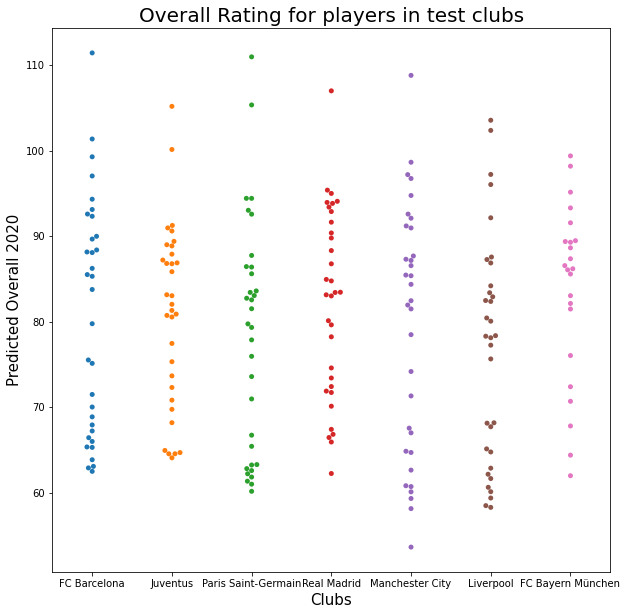

In [12]:
club_set = ["FC Barcelona","FC Bayern München","Real Madrid" ,"Paris Saint-Germain","Juventus","Manchester City","Liverpool"]
club_set_idx = list(map(lambda x: x in club_set, X_test_full.club))
club_data = [X_test_full[club_set_idx].club.values, fifa_20_pred[club_set_idx].values]

plt.figure(figsize=(10,10))
sns.swarmplot(x=club_data[0], y=club_data[1])
plt.xlabel("Clubs", fontsize=15)
plt.ylabel("Predicted Overall 2020", fontsize=15)
plt.title("Overall Rating for players in test clubs", fontsize=20)

<div style="color:black;background-color:#F6E6E2"-">

# **Part B - Classify player position**  

Can a professional defender become a forward?

Train on data from FIFA 19. Predict the player_position variable using other skill statistics for players in the FIFA 20 Edition. Train on all players from FIFA 19

Graphically represent the predicted player_position for the players in Test Set 

**Details :** 

Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. *

The final score will be assigned using Classification accuracy

Test Set: Players from the following Clubs 
<ul>
                                                   
- FC Barcelona

- FC Bayern München

- Real Madrid 

- Paris Saint-Germain

- Juventus

- Atlético Madrid

- Manchester City

- Liverpool 

- Manchester United
</ul>

In [13]:
#Loading data
X_train_full = fifa_19.drop('player_positions', axis=1)
X_test_full = fifa_20.drop('player_positions', axis=1)
y_train_full = fifa_19["player_positions"]
y_test_full= fifa_20["player_positions"]

X_train_full.set_index("sofifa_id", inplace=True)
X_test_full.set_index("sofifa_id", inplace=True)
y_train_full.index = X_train_full.index
y_test_full.index = X_test_full.index

In [14]:
def preprocess_B(x_train, x_test, y_train, y_test):
    """Preprocessing step for Part A"""
    train = x_train.copy()
    test = x_test.copy()
    
    #Decided after looking at train data
    replace_median = ['release_clause_eur', 'team_jersey_number', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
    
    #Dropping Columns with many missing values or repetitive info
    drop = ['value_eur','wage_eur', 'player_url','short_name','long_name','potential','real_face','player_tags', 'loaned_from', 'club', "gk_diving", 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'nation_position', 'nation_jersey_number', 'dob', 'joined']
    train.drop(drop, axis=1, inplace=True)
    test.drop(drop, axis=1, inplace=True)
    
    #Imputing median values to selected columns
    for col in replace_median:
        #Convert to float 
        if train[col].dtype not in ["float64", "int64"]:
            train[col] = pd.Series(map(try_eval, train[col]))
            test[col] = pd.Series(map(try_eval, test[col]))    
        imputer = SimpleImputer(strategy="median")
        train[col] = imputer.fit_transform(train[[col]])
        test[col] = imputer.transform(test[[col]])
            
    #categorical data
    #Listing all categorical cols
    categorical_cols = [col for col in train.columns if train[col].dtype not in ["float64", "int64"]]  

    #Imputing most_frequent values to categorical data
    imputer = SimpleImputer(strategy="most_frequent")
    train_cat = imputer.fit_transform(train[categorical_cols])
    test_cat = imputer.transform(test[categorical_cols])
    
    #OneHotEncoding categorical columns
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    train.drop(categorical_cols, axis=1, inplace=True)
    train_cat = pd.DataFrame(ohe.fit_transform(train_cat))
    train_cat.index = x_train.index
    train = train.join(train_cat)

    test_cat = pd.DataFrame(ohe.transform(test_cat))
    test_cat.index = x_test.index
    test.drop(categorical_cols, axis=1, inplace=True)
    test = test.join(test_cat)

    #Preprocessing y values
    #Changing player to hold only one position (hardcoding first position that appears)
    lst1 = []
    for i in y_train.astype(str):
        lst1.append(i.split(", ")[0])
    y_train = np.array(lst1)

    #Scaler
    scaler = MinMaxScaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    
    return train, y_train, test, y_test


def return_accuracy(y_true, y_pred):
    """
    Returns accuracy score,
    When y_pred has more than one correct answer

    example:
    y_true = ["A, B, C",
              "X, Y, Z"]
    y_pred = ["C",
              "D"]
    return_accuracy(y_true, y_pred) = .5
    """
    assert len(y_true)==len(y_pred)
    bools = list(map(lambda x: x[0] in x[1].split(", "), zip(y_pred, y_true)))
    return np.array(bools).sum()/len(y_true)

X_train, y_train, X_test, y_test = preprocess_B(X_train_full, X_test_full, y_train_full, y_test_full)

Text(0, 0.5, 'Frequency')

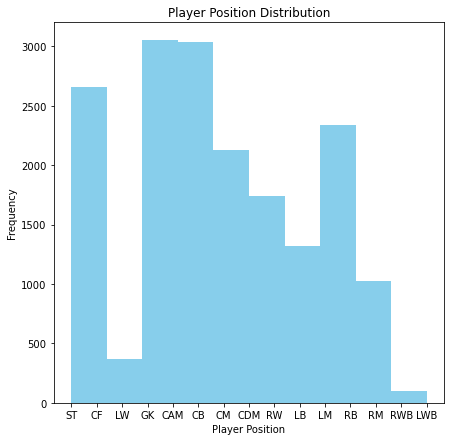

In [15]:
plt.figure(figsize=(7,7))
plt.hist(y_train, color="skyblue")
plt.title("Player Position Distribution")
plt.xlabel("Player Position")
plt.ylabel("Frequency")


In [16]:
#Logistic Regression
log_reg = LogisticRegressionCV(max_iter=100, n_jobs=-1)
log_reg.fit(X_train, y_train)
y_test_pred_lr = log_reg.predict(X_test)
y_train_pred_lr = log_reg.predict(X_train)

#return_accuracy --> Returns accuracy score, When y_pred has more than one correct answer
test_accuracy_lr = return_accuracy(y_test, y_test_pred_lr)
train_accuracy_lr = return_accuracy(y_train, y_train_pred_lr)

print("Model: Logistic Regression")
print(f"Train Accuracy {train_accuracy_lr*100:.2f} %")
print(f"Test  Accuracy {test_accuracy_lr*100:.2f} %")

Model: Logistic Regression
Train Accuracy 78.36 %
Test  Accuracy 86.68 %


Text(0.5, 1.0, 'Predicted Player Position, by Clubs')

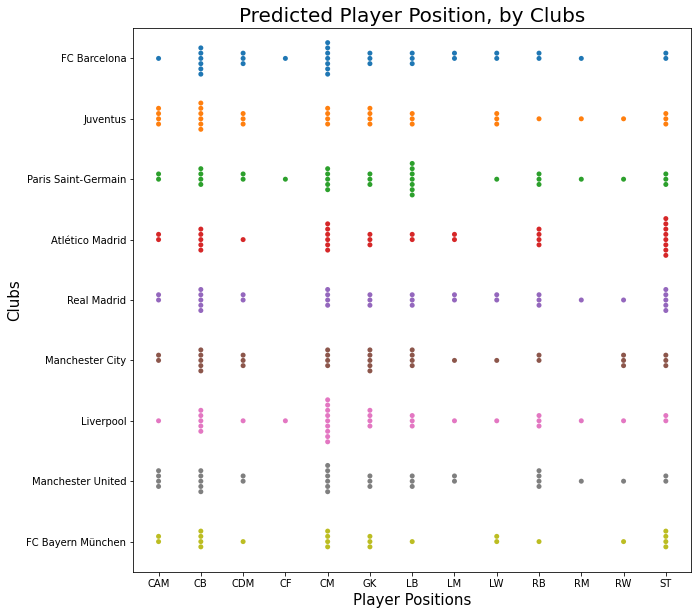

In [17]:
club_set = ['FC Barcelona',
'FC Bayern München',
'Real Madrid',
'Paris Saint-Germain',
'Juventus',
'Atlético Madrid',
'Manchester City',
'Liverpool',
'Manchester United']

club_set_idx = list(map(lambda x: x in club_set, X_test_full.club))
club_data = [X_test_full[club_set_idx].club.values, y_test_pred_lr[club_set_idx]]

plt.figure(figsize=(10,10))
enc = LabelEncoder()
sns.swarmplot(y=club_data[0], x=enc.fit_transform(club_data[1]))
plt.xticks(list(range(13)), labels=enc.classes_)
plt.xlabel("Player Positions", fontsize=15)
plt.ylabel("Clubs", fontsize=15)
plt.title("Predicted Player Position, by Clubs", fontsize=20)

<div style="color:black;background-color:#F6E6E2"-">

# **Part C - Which Club has the Best Staff**  

The best staff always help their players grow, can you identify that using historical data?

Study player data from Division 1 European League* players from the last 5 Years. Analyze changes in player stats and value. Rank the clubs according to best increase in statistics of a player

Graphically represent the scores for the test set

**Details :**

Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. 

Assign a score to all clubs out of 100, and represent it in an appropriate visualization. With 100 being the highest 

For the test set, your model will be scored using MSE against the average of all models of the class. (Score = MSE( Your Values , Average of all models values))

The test set is as follows for this problem statement (Division 1 European League):

Leagues to be considered

  - Premier League - English Premier League

  - Bundesliga German 1. Bundesliga

  - Ligue 1 French Ligue 1

  - La Liga Spain Primera Division

  - Serie A Italian Serie A

In [18]:
data = {"fifa_15": pd.read_csv("fifadataset/players_15.csv"),
        "fifa_16": pd.read_csv("fifadataset/players_16.csv"),
        "fifa_17": pd.read_csv("fifadataset/players_17.csv"),
        "fifa_18": pd.read_csv("fifadataset/players_18.csv"),
        "fifa_19": pd.read_csv("fifadataset/players_19.csv"),
        "fifa_20": pd.read_csv("fifadataset/players_20.csv")}

leagues = pd.read_csv("fifadataset/teams_and_leagues.csv")

#Adding new column Year
for key in data:
    data[key]["year"] = 2000 + eval(key.split("_")[-1])
    
merged_data = pd.DataFrame().append([data[year] for year in data])
grouped_data = merged_data.groupby(["club", "sofifa_id"])

In [19]:
def preprocess_C(data):
    df = data.copy()
    
    #Decided after looking at train data
    cols = ['release_clause_eur', 'team_jersey_number', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
    
    #Dropping Columns with many missing values or repetitive info
    drop = ['value_eur','wage_eur', 'player_url','potential','real_face','player_tags', 'loaned_from']
    data.drop(drop, axis=1, inplace=True)
    
    for col in cols:
        #Convert to float 
        if data[col].dtype not in ["float64", "int64"]:
            data[col] = pd.Series(map(try_eval, data[col])) 
            
    return data

merged_data = preprocess_C(merged_data)

In [20]:
#Grouping data so that it makes easier to track how a player improved over the years when he was in a particular club
#Dropping players who haven't completed a year in club

grouped_data = (merged_data.groupby(["club", "sofifa_id"]).filter(lambda x : x.shape[0]>1)).groupby(["club", "sofifa_id"])

#Every subframe of group data contains a player's history in that club
grouped_data.get_group(("Real Madrid", 20801))

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,...,66.0,66.0,66.0,66.0,60.0,55.0,55.0,55.0,60.0,2015
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,93,...,66.0,66.0,66.0,66.0,60.0,55.0,55.0,55.0,60.0,2016
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,94,...,65.0,65.0,65.0,65.0,57.0,48.0,48.0,48.0,57.0,2017
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,94,...,65.0,65.0,65.0,65.0,57.0,48.0,48.0,48.0,57.0,2018


Text(0.5, 1.0, "Ronaldo's pace over the years when he was in Real Madrid")

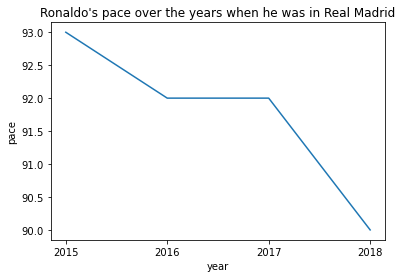

In [21]:
#Looking at Ronaldo's pace when he was in Real Madrid
d = grouped_data.get_group(("Real Madrid", 20801))
sns.lineplot(x=d.year, y=d['pace'])
plt.xticks(d.year)
plt.title("Ronaldo's pace over the years when he was in Real Madrid")

In [22]:
skills = ['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 
          'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 
          'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
          'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 
          'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 
          'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 
          'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle',
          'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
          'goalkeeping_reflexes']

groups, ids = zip(*grouped_data.groups)
player_by_club = {grp : [] for grp in set(groups)}
for i in range(len(ids)):
    player_by_club[groups[i]].append(ids[i])

In [23]:
#Over all clubs
club_performance = pd.DataFrame(columns=skills)
for club in player_by_club:
    
    player_performance = pd.DataFrame(columns=skills)
    #Over all players
    for player in player_by_club[club]:
        subframe = grouped_data.get_group((club, player))[skills]
        
        #Over all years
        #Differece in skill stats over years
        for i in range(subframe.shape[0]-1):
            if (i):
                #cum_sum is difference is skills over years summed
                cum_sum+=subframe.iloc[i+1]-subframe.iloc[i]
            else:
                cum_sum=subframe.iloc[i+1]-subframe.iloc[i]
                
        #average increase or decrease in skill points over years
        cum_sum /= (subframe.shape[0]-1)
        player_performance.loc[player] = cum_sum
    
    #Storing Median increase/decrease in skill points as per club
    club_performance.loc[club] = player_performance.median()
    
club_performance.head()

,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
RC Celta,1.75,-1.5,0.875,1.75,1.000000,1.125,0.00,4.0,-0.5,-0.50,...,1.4,NaN,0.00,0.666667,3.666667,0.000000,0.000000,0.75,-0.500,1.00
Al Fayha,0.00,-1.0,0.000,0.50,0.500000,0.000,1.00,1.0,-0.5,-2.00,...,0.5,NaN,1.50,-1.500000,-3.750000,0.750000,1.000000,0.75,0.750,-0.25
Cosenza,4.00,0.0,3.000,5.00,4.000000,2.000,1.00,-4.0,1.0,8.00,...,0.0,NaN,2.00,7.000000,2.000000,2.000000,0.000000,0.00,-1.000,-4.00
Jönköpings Södra IF,1.00,0.0,0.000,0.00,0.000000,0.000,1.00,4.0,-5.0,15.00,...,-6.0,NaN,19.00,14.000000,13.000000,1.000000,1.000000,0.00,-2.000,0.00
Rochdale,2.00,0.0,0.500,1.00,0.833333,1.000,1.55,-0.9,-0.2,-0.25,...,3.0,NaN,-2.85,-1.100000,-0.666667,-0.366667,-0.416667,1.00,-0.625,0.25


In [24]:
#Rank the clubs according to best increase in criterion of a player

def ranking(criterion, top=3):
    assert criterion in club_performance.columns, "criterion must be in " + str(list(club_performance.columns))

    print(f"\"Club with Best Staff\"\nRanking (A/c to player improvement in {criterion})\n")
    club_performance.sort_values([criterion], ascending=False, inplace=True)
    for i, club in enumerate(club_performance.index):
        if (i==top):
            break
        print(f"{i+1}. {club}")
    print("\n================================================================================================\n")
        
ranking("defending")
ranking("dribbling")
ranking("physic")
ranking("overall")

"Club with Best Staff"
Ranking (A/c to player improvement in defending)

1. Brazil
2. IF Brommapojkarna
3. Pisa


"Club with Best Staff"
Ranking (A/c to player improvement in dribbling)

1. Greece
2. FC Barcelona B
3. Eskişehirspor


"Club with Best Staff"
Ranking (A/c to player improvement in physic)

1. IF Brommapojkarna
2. Chile
3. FC Barcelona B


"Club with Best Staff"
Ranking (A/c to player improvement in overall)

1. FC Barcelona B
2. Uniautónoma FC
3. Eskişehirspor




### Thank You